In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# additional imports
from netCDF4 import Dataset

In [2]:
#noIA_nc = Dataset('noIA_3lvl.nc')
redIAsundaGL_nc = Dataset('redIAsundaGL_3lvl.nc')
redIAsunda10GL_nc = Dataset('redIAsunda10GL_3lvl.nc')
redIAsunda5GL_nc = Dataset('redIAsunda5GL_3lvl.nc')
control_nc = Dataset('control_3lvl.nc')

control_nc.variables.keys()

dict_keys(['lon', 'lat', 'lith', 'runs', 'atm_CO2_level', 'volcanic_degassing', 'weathering'])

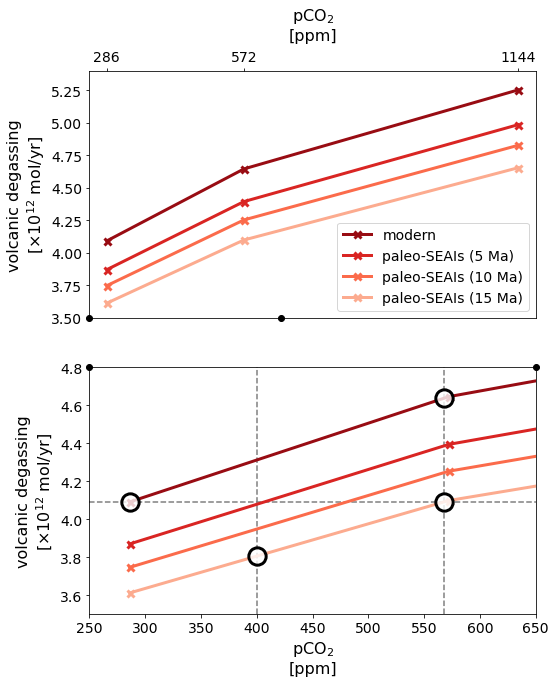

In [3]:
nc_list = [control_nc, redIAsunda5GL_nc, redIAsunda10GL_nc, redIAsundaGL_nc]
label_list = ['modern', 'paleo-SEAIs (5 Ma)', 'paleo-SEAIs (10 Ma)', 'paleo-SEAIs (15 Ma)']

cmap = matplotlib.cm.get_cmap('Reds')
cmap_inds = np.linspace(0.9,0.3,len(nc_list))

fig, ax = plt.subplots(figsize=(8,10), nrows=2, ncols=1)

# weatherability curves
for i in range(len(nc_list)):
    for j in range(2):
        ax[j].plot(nc_list[i].variables['atm_CO2_level'][:].data,
                   nc_list[i].variables['volcanic_degassing'][:].data/1e12,
                   'x-', c=cmap(cmap_inds[i]), label=label_list[i], linewidth=3,
                   markersize=7, markeredgewidth=3)

# pre-industrial
ax[1].scatter(control_nc.variables['atm_CO2_level'][0].data,
              control_nc.variables['volcanic_degassing'][0].data/1e12,
              s=300, zorder=99, facecolor=(1,1,1,0.8), edgecolor='k', linewidth=3)

# weatherability scenario
pCO2_A1_interp = np.interp(control_nc.variables['volcanic_degassing'][0].data/1e12,
                           redIAsundaGL_nc.variables['volcanic_degassing'][:].data/1e12,
                           redIAsundaGL_nc.variables['atm_CO2_level'][:].data)

ax[1].scatter(pCO2_A1_interp,
              control_nc.variables['volcanic_degassing'][0].data/1e12,
              s=300, zorder=99, facecolor=(1,1,1,0.8), edgecolor='k', linewidth=3)

# degassing scenario
degassing_A2_interp = np.interp(pCO2_A1_interp,
                                control_nc.variables['atm_CO2_level'][:].data,
                                control_nc.variables['volcanic_degassing'][:].data/1e12)

ax[1].scatter(pCO2_A1_interp,
              degassing_A2_interp,
              s=300, zorder=99, facecolor=(1,1,1,0.8), edgecolor='k', linewidth=3)

# weatherability and degassing scenario
degassing_A3_interp = np.interp(400,
                                redIAsundaGL_nc.variables['atm_CO2_level'][:].data,
                                redIAsundaGL_nc.variables['volcanic_degassing'][:].data/1e12)

ax[1].scatter(400,
              degassing_A3_interp,
              s=300, zorder=99, facecolor=(1,1,1,0.8), edgecolor='k', linewidth=3)

# prettify
ax[0].legend(fontsize=14, loc='lower right')
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position('top')
ax[0].set_xlabel('pCO$_{2}$\n[ppm]', fontsize=16, labelpad=10)

ax[0].set_xlim(250,1144+(286-250))
ax[0].set_xticks([286, 572, 1144])
ax[0].set_ylim(3.5,5.4)

ax[1].set_xlim(250,650)
ax[1].set_ylim(3.5, 4.8)

ax[0].scatter([250,650],[3.5,3.5],c='k',clip_on=False)
ax[1].scatter([250,650],[4.8,4.8],c='k',clip_on=False)

ax[1].axvline(pCO2_A1_interp, ls='--', c='C7', zorder=-99)
ax[1].axvline(400, ls='--', c='C7', zorder=-99)
ax[1].axhline(control_nc.variables['volcanic_degassing'][0].data/1e12, ls='--', c='C7', zorder=-99)

ax[1].set_xlabel('pCO$_{2}$\n[ppm]', fontsize=16)

for i in range(2):
    ax[i].set_ylabel('volcanic degassing\n[$\\times$10$^{12}$ mol/yr]', fontsize=16)
    ax[i].tick_params(axis='both', labelsize=14)

#plt.savefig('../../../Manuscript/Figures/weatherability_curves_raw.pdf', bbox_inches='tight')
plt.show(fig)

In [4]:
print('present day degassing = {:.2f} e12 mol/yr'.format(control_nc.variables['volcanic_degassing'][0].data/1e12))
print('A2 degassing          = {:.2f} e12 mol/yr'.format(degassing_A2_interp))
print('ratio                 = {:.2f}'.format(degassing_A2_interp/\
                                              (control_nc.variables['volcanic_degassing'][0].data/1e12)))

present day degassing = 4.09 e12 mol/yr
A2 degassing          = 4.64 e12 mol/yr
ratio                 = 1.13


In [5]:
print('A1 pCO2 = {:.2f} ppm'.format(pCO2_A1_interp))

A1 pCO2 = 567.50 ppm


In [6]:
print('present day degassing = {:.2f} e12 mol/yr'.format(control_nc.variables['volcanic_degassing'][0].data/1e12))
print('A3 degassing          = {:.2f} e12 mol/yr'.format(degassing_A3_interp))
print('ratio                 = {:.2f}'.format(degassing_A3_interp/\
                                              (control_nc.variables['volcanic_degassing'][0].data/1e12)))

present day degassing = 4.09 e12 mol/yr
A3 degassing          = 3.81 e12 mol/yr
ratio                 = 0.93
